# Introduction to Machine Learning

In [1]:
from verticapy import *

In [2]:
from verticapy.connections import *
new_auto_connection({"host": "34.237.154.116", 
                     "port": "5433", 
                     "database": "testdrive", 
                     "password": "password", 
                     "user": "dbadmin"},
                    name = "VerticaDSN")
# Set the primary auto-connection
change_auto_connection("VerticaDSN")

When the data are prepared, one of the last stages of the Data Science Cycle is the Data Modeling. Machine Learning Algorithms are a set of statistical techniques which will use train data to build mathematical models. There are 2 main categories:
<ul class="ul_content">
 <li><b>Supervised</b> : these algorithms are used when we want to predict a response column.</li>
 <li><b>Unsupervised</b> : these algorithms are used when we want to detect anomalies or when we want to segment the data. No response column is needed.</li>
</ul>

Let's explain these two categories in detail. 

# Supervised Learning

Supervised Learning techniques are mapping an input to an output based on example. We can identify two main categories of Supervised Learning.
<ul class="ul_content">
 <li><b>Regression</b> : The Response is Numerical (Linear Regression, SVM Regression, RF Regression...)</li>
 <li><b>Classification</b> : The Response is Categorical (Gradient Boosting, Naive Bayes, Logistic Regression...)</li>
</ul>
 
For example, when we want to predict the total charges of a telco customer using his/her tenure is a Regression. The following code is drawing a Linear Regression model using the 'TotalCharges' as a function of the 'tenure' in the Telco Churn Dataset.

,AbccustomerIDVarchar(20),AbcgenderVarchar(20),123SeniorCitizenInt,010PartnerBoolean,010DependentsBoolean,123tenureInt,010PhoneServiceBoolean,AbcMultipleLinesVarchar(100),AbcInternetServiceVarchar(22),AbcOnlineSecurityVarchar(38),AbcOnlineBackupVarchar(38),AbcDeviceProtectionVarchar(38),AbcTechSupportVarchar(38),AbcStreamingTVVarchar(38),AbcStreamingMoviesVarchar(38),AbcContractVarchar(28),010PaperlessBillingBoolean,AbcPaymentMethodVarchar(50),"123MonthlyChargesNumeric(8,3)","123TotalChargesNumeric(9,3)",010ChurnBoolean
1,0014-BMAQU,Male,0,✅,❌,63,✅,Yes,Fiber optic,Yes,No,No,Yes,No,No,Two year,✅,Credit card (automatic),84.65,5377.8,❌
2,0031-PVLZI,Female,0,✅,✅,4,✅,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,❌,Mailed check,20.35,76.35,✅
3,0057-QBUQH,Female,0,❌,✅,43,✅,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,✅,Electronic check,25.1,1070.15,❌
4,0137-OCGAB,Female,0,❌,❌,1,✅,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,✅,Mailed check,80.2,80.2,✅
5,0139-IVFJG,Female,0,✅,❌,2,✅,No,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,❌,Electronic check,90.35,190.5,❌
6,0178-SZBHO,Male,0,✅,✅,47,✅,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,❌,Electronic check,87.2,4017.45,❌
7,0208-BPQEJ,Female,0,✅,✅,12,✅,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,❌,Bank transfer (automatic),19.4,198.1,❌
8,0219-YTZUE,Male,0,✅,✅,4,✅,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,✅,Bank transfer (automatic),84.8,371.9,✅
9,0220-EBGCE,Male,0,❌,❌,2,✅,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,✅,Electronic check,85.85,167.3,✅
10,0229-LFJAF,Male,0,❌,❌,72,✅,Yes,DSL,Yes,Yes,Yes,Yes,No,No,Two year,❌,Bank transfer (automatic),69.65,4908.25,❌

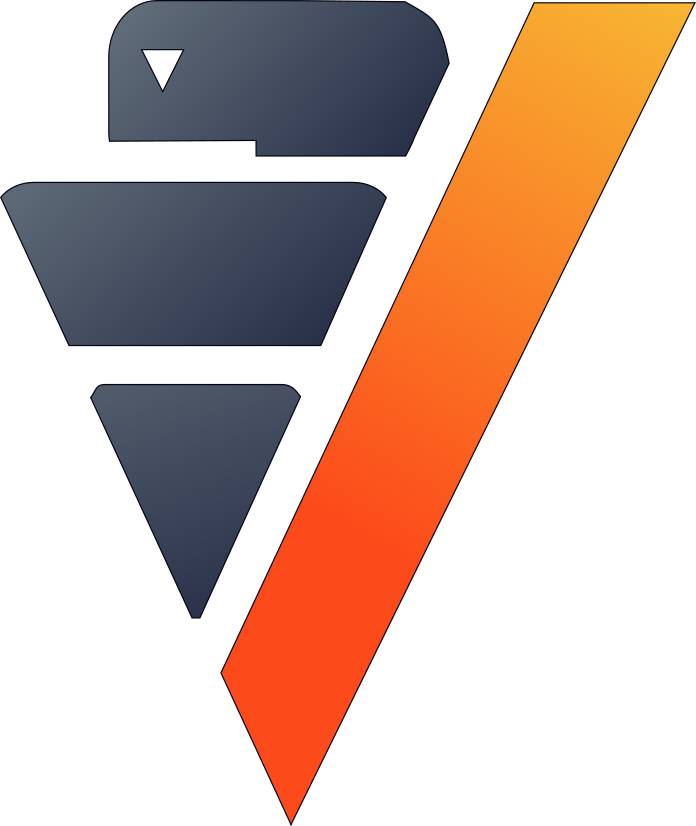

In [3]:
churn = vDataFrame('churn')
churn

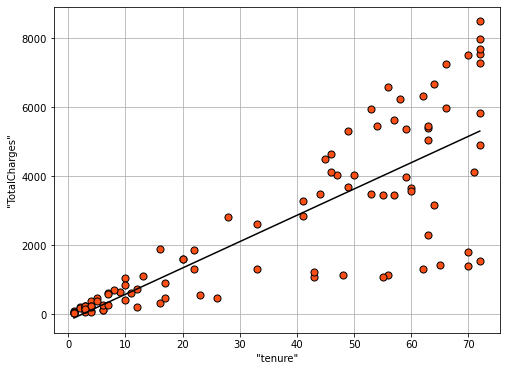

In [4]:
from verticapy.learn.linear_model import LinearRegression
from verticapy import *
model = LinearRegression("LR_churn")
model.drop()
model.fit("churn", ["tenure"], "TotalCharges")
model.plot()

When we have to predict a categorical column, we are dealing with classification. Let's see an example where we will use a Linear SVC to predict the flower specie using its Petal and Sepal Lengths. 

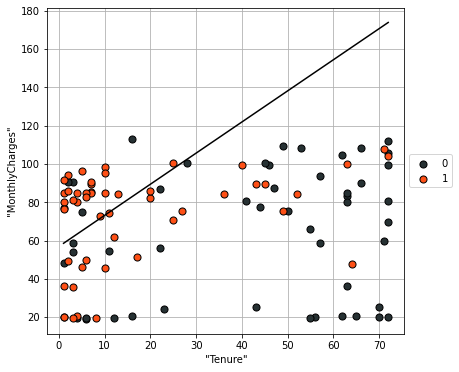

In [5]:
from verticapy.learn.svm import LinearSVC
model = LinearSVC("svc_churn")
model.drop()
model.fit("churn", ["Tenure", "MonthlyCharges"], "churn")
model.plot()

When the number of categories is greater than 2, we use the expression 'Multiclass Classification' instead of 'Classification'.

# Unsupervised Learning

These algorithms are to use to segment the data (KMeans, DBSCAN...) or to detect anomalies (Local Outlier Factor, Z-Score Techniques...). They are to use to find unknown patterns without pre-existing labels. For example, let's use a KMeans to create different clusters on the Smart Meters dataset. Each cluster will represent a region.

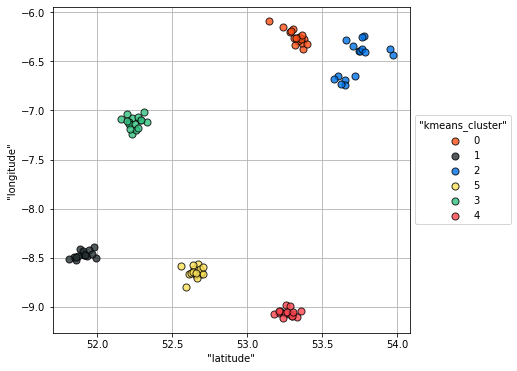

In [6]:
from verticapy.learn.cluster import KMeans
model = KMeans("KMeans_sm", n_cluster = 6)
model.drop()
model.fit("sm_meters", ["latitude", "longitude"])
model.plot()